The IMDB Dataset has 50,000 highly different reviews from the Internet Movie database. We split the data into two parts : 
o	Training – 25,000 reviews
o	Testing  - 25,000 reviews

Key Points:
I have used the following 7 different scenarios for evaluating the model performance:
1)The original IMDB data set with 2 hidden layers, 16 units and relu as an activation function
2) Neural Network : Three hidden layers
3) Neural network : a) With 32 Units and b) With 64 Units
4) Loss : MSE instead of Binary Cross Entropy
5) Activation Function : tanh instead of Relu
6) Optimizer : Adam instead of Binary Cross Entropy
7) Regularization of Model Performance on Validation

**Scenario - 1: The original IMDB with 2 hidden layers**

**Loading the IMDB Dataset**

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels[0]

1

As we are only focusing on 10,000 most frequent words, the word index will not exceed 10,000

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Encoding the integer sequences via multi-hot encoding**

We are turning the lists into tensors via multi-hot encoding. The encoding turns the lists into 0s and 1s.



In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Model Definition**

The sigmoid activation will give the ouput as probability(i.e., a score between 0 and 1)

In [ ]:
np.random.seed(123)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the Model**

This is the point where we choose a loss function and an optimizer. The problem is a binary classification and the output of the network is a probability and also the end of the network is a single-unit layer with a sigmoid activation, it’s best to use the binary_crossentropy.

In [ ]:
model.compile(optimizer="RMSprop",
              loss="BinaryCrossentropy",
              metrics=["accuracy"])

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5177 - accuracy: 0.7771 - val_loss: 0.4066 - val_accuracy: 0.8435
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3027 - accuracy: 0.9051 - val_loss: 0.3038 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2196 - accuracy: 0.9283 - val_loss: 0.2893 - val_accuracy: 0.8845
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1727 - accuracy: 0.9421 - val_loss: 0.2906 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1422 - accuracy: 0.9543 - val_loss: 0.2905 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1178 - accuracy: 0.9643 - val_loss: 0.2955 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0960 - accuracy: 0.9720 - val_loss: 0.3105 - val_accuracy: 0.8845
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

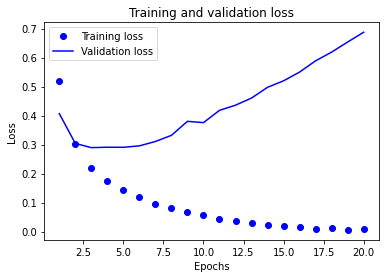

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

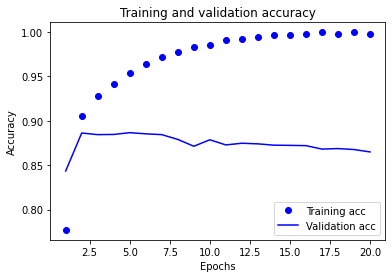

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="RMSprop",
              loss="BinaryCrossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4580 - accuracy: 0.8251
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2650 - accuracy: 0.9060
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2041 - accuracy: 0.9280
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2896 - accuracy: 0.8852


In [ ]:
results

[0.28960129618644714, 0.885200023651123]

Observations from two hidden layers:

In the above we have used two hidden layers and Relu as activation function, Rms prop as optimizer, Binary Cross Entropy as loss. The following are the observations:

With Epoch = 20, we have the best accuracy at epoch 5/20 i.e., 0.8867
We can also observe that training loss decreases with epoch and validation loss increases.The validation accuracy is either decreasing or being constant with every epoch and training accuracy is increasing
With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9392
This approach has an accuracy of 88%

**Scenario:2 Neural Network - Three hidden layers**


In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
np.random.seed(123)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="RMSprop",
              loss="BinaryCrossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5453 - accuracy: 0.7649 - val_loss: 0.3886 - val_accuracy: 0.8682
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3041 - accuracy: 0.9021 - val_loss: 0.3097 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2129 - accuracy: 0.9292 - val_loss: 0.2979 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1671 - accuracy: 0.9421 - val_loss: 0.2811 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1263 - accuracy: 0.9597 - val_loss: 0.3281 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1056 - accuracy: 0.9637 - val_loss: 0.3341 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0780 - accuracy: 0.9755 - val_loss: 0.3680 - val_accuracy: 0.8816
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

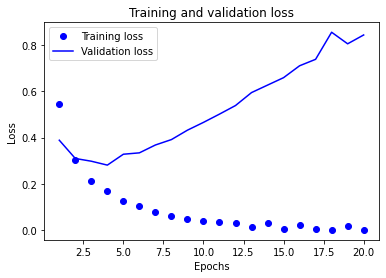

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

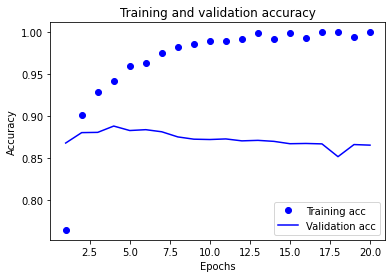

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="RMSprop",
              loss="BinaryCrossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4913 - accuracy: 0.8134
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2621 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1952 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3956 - accuracy: 0.8510


In [ ]:
results

[0.3956012427806854, 0.8510000109672546]

Observations from three hidden layers:

In the above we have used three hidden layers and Relu as activation function, Rms prop as optimizer, Binary Cross Entropy as loss. The following are the observations:
*   With Epoch = 20, we have the best accuracy at epoch 4/20 i.e., 0.8884
*   We can also observe that training loss decreases with epoch and       validation loss increases. The training accuracy increases with every epoch and validation is increasing and then being constant with not much percentage of increase or decrease
*   With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9429
*   This approach has an accuracy of 85%













**Scenario - 2: A)Neural Network: Two layers with 32units**

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.4923 - accuracy: 0.7905 - val_loss: 0.3494 - val_accuracy: 0.8809
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2768 - accuracy: 0.9038 - val_loss: 0.2852 - val_accuracy: 0.8913
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2038 - accuracy: 0.9282 - val_loss: 0.3240 - val_accuracy: 0.8686
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1571 - accuracy: 0.9461 - val_loss: 0.2812 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1255 - accuracy: 0.9592 - val_loss: 0.3078 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1025 - accuracy: 0.9653 - val_loss: 0.3436 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0799 - accuracy: 0.9751 - val_loss: 0.3403 - val_accuracy: 0.8803
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

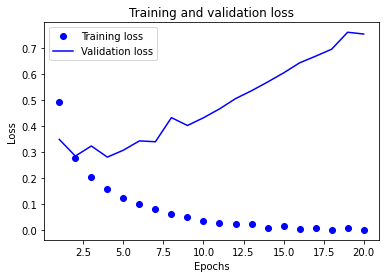

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

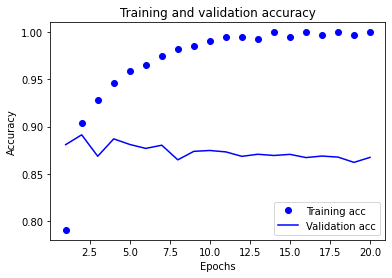

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4286 - accuracy: 0.8238
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2434 - accuracy: 0.9121
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1896 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3412 - accuracy: 0.8680


In [ ]:
results

[0.3411709666252136, 0.8679999709129333]

Observations from the Nueral Networks two layers with 32units:

In the above we have used two hidden layers with 32 units and Relu as activation function, Rms prop as optimizer, Binary Cross Entropy as loss. The following are the observations:
*   With Epoch = 20, we have the best accuracy at epoch 2/20 i.e., 0.8913
*   We can also observe that training loss decreases with epoch and validation loss increases. The training accuracy increases with every epoch and the validation accuracy is increasing in the beginning and the being constant 
 With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9434
*   This approach has an accuracy of 86%

**Scenario 2B - Neural Network: Two layers with 64units**

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
47/47 [==============================] - 3s 50ms/step - loss: 0.4229 - accuracy: 0.8101 - val_loss: 0.3209 - val_accuracy: 0.8670
Epoch 2/20
47/47 [==============================] - 2s 46ms/step - loss: 0.2368 - accuracy: 0.9112 - val_loss: 0.2878 - val_accuracy: 0.8720
Epoch 3/20
47/47 [==============================] - 2s 46ms/step - loss: 0.1841 - accuracy: 0.9299 - val_loss: 0.3780 - val_accuracy: 0.8540
Epoch 4/20
47/47 [==============================] - 2s 45ms/step - loss: 0.1414 - accuracy: 0.9487 - val_loss: 0.3072 - val_accuracy: 0.8780
Epoch 5/20
47/47 [==============================] - 2s 46ms/step - loss: 0.1115 - accuracy: 0.9608 - val_loss: 0.3105 - val_accuracy: 0.8860
Epoch 6/20
47/47 [==============================] - 2s 45ms/step - loss: 0.0813 - accuracy: 0.9727 - val_loss: 0.3374 - val_accuracy: 0.8840
Epoch 7/20
47/47 [==============================] - 2s 45ms/step - loss: 0.0593 - accuracy: 0.9803 - val_loss: 0.3815 - val_accuracy: 0.8860
Epoch 8/20
47

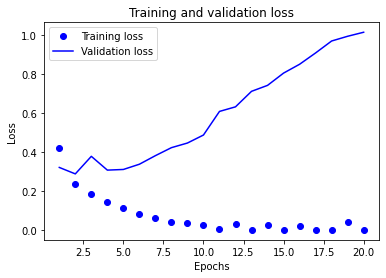

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

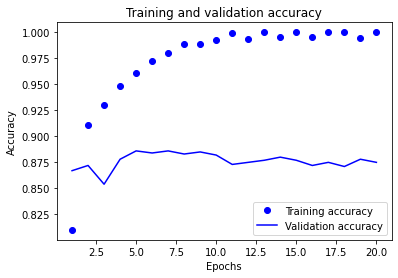

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 44ms/step - loss: 0.4190 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2394 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.1818 - accuracy: 0.9311
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4110 - accuracy: 0.8526


In [ ]:
results

[0.41095006465911865, 0.8526399731636047]

Observations from the Nueral Networks two layers with 64units:

In the above we have used two hidden layers with 64 units and Relu as activation function, Rms prop as optimizer, Binary Cross Entropy as loss. The following are the observations:

With Epoch = 20, we have the best accuracy at epoch 5/20 and 7/20 i.e., 
0.8860
We can also observe that training loss decreases with epoch and validation loss increases. The training accuracy increases with every epoch and validation accuracy increases and one point and is then constant with no much of a increase or decrease.
With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9449
This approach has an accuracy of 85%

**Scenario 4 - Neural Network : MSE instead of Binary Cross Entropy**

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="MeanSquaredError",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.1745 - accuracy: 0.7845 - val_loss: 0.1217 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0928 - accuracy: 0.9043 - val_loss: 0.0959 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0655 - accuracy: 0.9278 - val_loss: 0.0931 - val_accuracy: 0.8746
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0506 - accuracy: 0.9458 - val_loss: 0.0839 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0393 - accuracy: 0.9588 - val_loss: 0.0894 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0315 - accuracy: 0.9689 - val_loss: 0.0856 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0260 - accuracy: 0.9750 - val_loss: 0.0910 - val_accuracy: 0.8741
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

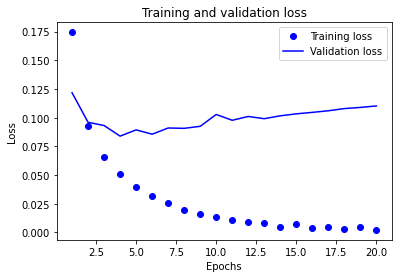

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

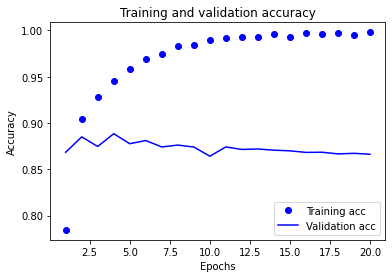

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="MeanSquaredError",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.1602 - accuracy: 0.8188
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0848 - accuracy: 0.9050
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0625 - accuracy: 0.9264
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0880 - accuracy: 0.8808


In [ ]:
results

[0.08804768323898315, 0.8807600140571594]

Observations from the Nueral Networks two layers with 16units:

In the above we have used two hidden layers with 16 units and Relu as activation function, Rms prop as optimizer, Mean Squared Error as loss. The following are the observations:

1)With Epoch = 20, we have the best accuracy at epoch 4/20 i.e., 0.8884.
2)We can also observe that training loss is decreasing and then slightly increasing with epoch and validation loss increases. The training accuracy increases with every epoch and validation accuracy increases and one point and is then constant with no much of a increase or decrease.
3)With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9418 
4)This approach has an accuracy of 88%

**Scenario 5 - Neural Network : Activation tanh instead of relu**

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 103ms/step - loss: 0.4828 - accuracy: 0.7999 - val_loss: 0.3558 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2766 - accuracy: 0.9089 - val_loss: 0.2941 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1946 - accuracy: 0.9351 - val_loss: 0.2913 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1465 - accuracy: 0.9493 - val_loss: 0.3064 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1144 - accuracy: 0.9631 - val_loss: 0.3019 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0902 - accuracy: 0.9719 - val_loss: 0.3448 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0694 - accuracy: 0.9780 - val_loss: 0.4065 - val_accuracy: 0.8683
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

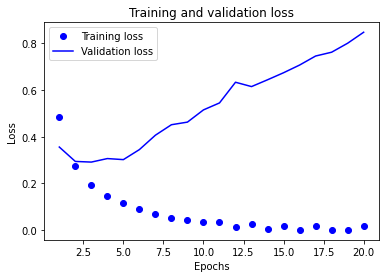

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

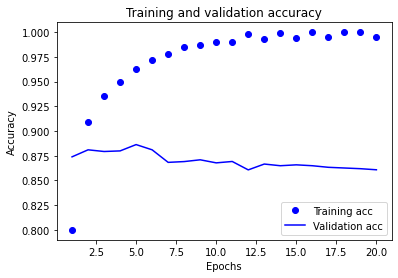

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.3954 - accuracy: 0.8289
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2187 - accuracy: 0.9158
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.1764 - accuracy: 0.9332
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3554 - accuracy: 0.8715


In [ ]:
results

[0.35540276765823364, 0.8715199828147888]

Observations from the Nueral Networks two layers with 16units:

In the above we have used two hidden layers with 16 units and Tanh as activation function, Rms prop as optimizer, Binary Cross Entropy as loss. The following are the observations:

1)With Epoch = 20, we have the best accuracy at epoch 5/20 i.e., 0.8863
2)We can also observe that training loss decreases with epoch and validation loss increases. The training accuracy increases with every epoch and validation accuracy increases and one point and is then constant with no much of a increase or decrease.
3)With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9463 
4)This approach has an accuracy of 87%

**Scenario 6 -  Neural Network: Adam instead of Binary Cross Entropy**

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
47/47 [==============================] - 3s 47ms/step - loss: 0.4078 - accuracy: 0.8336 - val_loss: 0.2554 - val_accuracy: 0.8910
Epoch 2/20
47/47 [==============================] - 2s 43ms/step - loss: 0.1952 - accuracy: 0.9287 - val_loss: 0.2705 - val_accuracy: 0.8890
Epoch 3/20
47/47 [==============================] - 2s 43ms/step - loss: 0.1367 - accuracy: 0.9528 - val_loss: 0.3008 - val_accuracy: 0.8820
Epoch 4/20
47/47 [==============================] - 2s 42ms/step - loss: 0.0968 - accuracy: 0.9672 - val_loss: 0.3388 - val_accuracy: 0.8900
Epoch 5/20
47/47 [==============================] - 2s 42ms/step - loss: 0.0634 - accuracy: 0.9811 - val_loss: 0.4003 - val_accuracy: 0.8750
Epoch 6/20
47/47 [==============================] - 2s 42ms/step - loss: 0.0357 - accuracy: 0.9915 - val_loss: 0.4699 - val_accuracy: 0.8790
Epoch 7/20
47/47 [==============================] - 2s 42ms/step - loss: 0.0180 - accuracy: 0.9975 - val_loss: 0.5247 - val_accuracy: 0.8800
Epoch 8/20
47

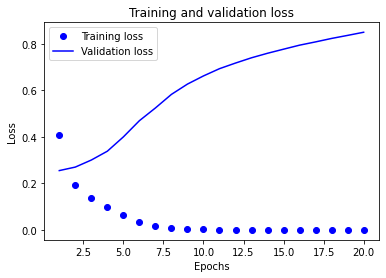

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

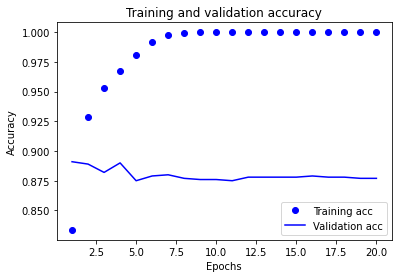

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="Adam",
              loss="BinaryCrossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 53ms/step - loss: 0.5104 - accuracy: 0.8032
Epoch 2/4
49/49 [==============================] - 2s 48ms/step - loss: 0.2717 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1981 - accuracy: 0.9311
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3014 - accuracy: 0.8812


In [ ]:
results

[0.3013661503791809, 0.8812000155448914]

Observations from the Nueral Networks two layers with 16units:

In the above we have used two hidden layers with 16 units and Relu as activation function, Adam as optimizer, Mean Squared Error as loss. The following are the observations:

1)With Epoch = 20, we have the best accuracy at epoch 4/20 i.e., 0.8900.
2)We can also observe that training loss decreases with epoch and validation loss increases. The training accuracy increases with every epoch and validation accuracy increases and one point and is then constant with no much of a increase or decrease.
3)With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9466 
4)This approach has an accuracy of 88%

**Scenario 7 - Neural Networks: Regularization for model performance on validation**

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5031 - accuracy: 0.7817 - val_loss: 0.3721 - val_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2960 - accuracy: 0.9014 - val_loss: 0.3539 - val_accuracy: 0.8539
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2173 - accuracy: 0.9308 - val_loss: 0.2883 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1729 - accuracy: 0.9442 - val_loss: 0.2790 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1398 - accuracy: 0.9553 - val_loss: 0.3027 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1147 - accuracy: 0.9659 - val_loss: 0.2989 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0955 - accuracy: 0.9715 - val_loss: 0.3367 - val_accuracy: 0.8769
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

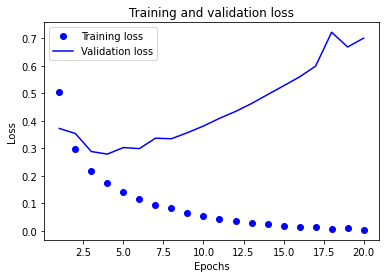

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

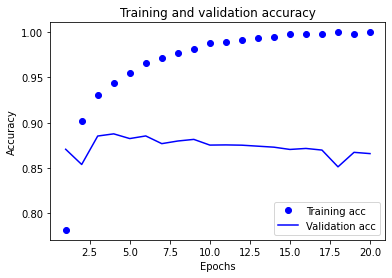

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4623 - accuracy: 0.8077
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2614 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2015 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3281 - accuracy: 0.8696


In [ ]:
results

[0.32807692885398865, 0.8695999979972839]

**Regularization **

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5743 - accuracy: 0.7564 - val_loss: 0.4668 - val_accuracy: 0.8349
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3764 - accuracy: 0.8896 - val_loss: 0.3407 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2675 - accuracy: 0.9181 - val_loss: 0.2914 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2069 - accuracy: 0.9358 - val_loss: 0.2785 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1696 - accuracy: 0.9445 - val_loss: 0.2718 - val_accuracy: 0.8933
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1382 - accuracy: 0.9566 - val_loss: 0.2807 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1122 - accuracy: 0.9660 - val_loss: 0.3068 - val_accuracy: 0.8843
Epoch 8/20
30

Observations from the Nueral Networks two layers with 16units:

In the above we have used two hidden layers with 16 units and Relu as activation function, Rms prop, Binary Cross Entropy as loss. The following are the observations:

1)With Epoch = 20, we have the best accuracy at epoch 4/20 i.e., 0.8877. 2)We can also observe that training loss decreases with epoch and validation loss increases. The training accuracy increases with every epoch and validation accuracy increases and one point and is then constant with no much of a increase or decrease. 3)With Epoch = 4, we have the best accuracy at epoch 4/4 i.e., 0.9410 4)This approach has an accuracy of 86%

After regularization on Validation the accuracy is best at epoch 5/20 i.e.,0.8933

**Conclusion:**

There is no one viable choice for the optimizers, loss, activation function, layers and units etc. Depending on the type of data set/problem we decide on the best suitable one amongst all the available options. I acquired best results in Scenario-6 that is with 16units two hidden layers and using the Adam as an optimizer.
